In [1]:
# default_exp core

# Core functions
> Some useful functions

In [2]:
import torch
import matplotlib.pyplot as plt

In [3]:
from nbdev.showdoc import *

In [4]:
#export
def stats(x):
    "Returns `mean` and `std` of a tensor"
    return x.mean(),x.std()

In [5]:
t = torch.randn((50,50))
t[:5,:5]

tensor([[-0.9148,  1.2227,  0.4659,  0.5872,  0.5512],
        [-1.9519, -1.2832,  0.0631, -0.2564,  0.4890],
        [-1.3250, -1.0425,  0.9737, -1.8215,  0.5384],
        [ 0.1404,  0.6289,  0.5332,  0.4312, -0.2850],
        [-1.2269,  0.7631, -1.8781, -0.1265, -0.6673]])

In [6]:
stats(t)

(tensor(0.0025), tensor(0.9980))

## Cross Entropy Loss

Softmax of our activations is defined by:

$$\hbox{softmax(x)}_{i} = \frac{e^{x_{i}}}{e^{x_{0}} + e^{x_{1}} + \cdots + e^{x_{n-1}}}$$

or more concisely:

$$\hbox{softmax(x)}_{i} = \frac{e^{x_{i}}}{\sum_{0 \leq j \leq n-1} e^{x_{j}}}$$ 

where $n$ is the number of classes.

In practice, we will need the log of the softmax when we calculate the loss.

In [7]:
#export
def log_softmax(x):
    
    return x - x.exp().sum(-1).log().unsqueeze(-1)

In [8]:
log_softmax(t)

tensor([[-5.2950, -3.1574, -3.9143,  ..., -5.3264, -3.5741, -3.8579],
        [-6.2414, -5.5726, -4.2264,  ..., -4.0205, -3.7569, -4.9641],
        [-6.4748, -6.1924, -4.1761,  ..., -3.8856, -4.3914, -5.3152],
        ...,
        [-6.1632, -5.1297, -4.4251,  ..., -5.0095, -5.1943, -6.5479],
        [-4.8420, -4.8018, -6.4605,  ..., -4.2695, -3.8227, -4.3938],
        [-3.9087, -3.6625, -3.4880,  ..., -6.2832, -5.6979, -3.7767]])

In [9]:
def accuracy(pred,y):
    "Accuracy metric"
    return (pred.argmax(dim=1) == y).float().mean()

In [10]:
def error(pred,y):
    "Error metric"
    return 1-accuracy(pred,y)

In [18]:
def nll(pred,yb):
    "Negative Log Likelihood Loss function"
    return -pred[range(yb.shape[0]), yb].mean()

## Plotting

In [11]:
#export
def plotdist(x,showsigmas=True):
    "Plot distribution `x` with optional `showsigmas`"
    fig = plt.figure(figsize=(4,3))
    m,s = x.mean(), x.std()
    n,_,_ = plt.hist(x.reshape(-1),bins=100);
    l = [i*s for i in (-3,-2,-1,1,2,3)] # three sigmas
    l.append(m) # plus mean
    if showsigmas: plt.vlines(l, 0, n.max(), color='white', alpha=0.2)
    ax = plt.title(f'Mean = {round(float(m),3)}; $\sigma$ = {round(float(s),3)}');

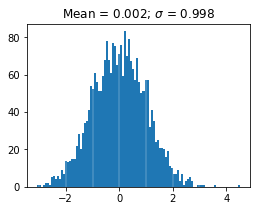

In [12]:
plotdist(t)

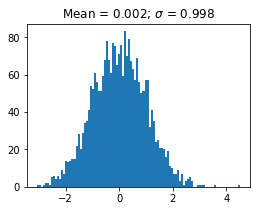

In [13]:
plotdist(t,showsigmas=False)

In [19]:
#hide
from nbdev.export import *
notebook2script()

Converted 00_core.ipynb.
Converted 01_mnist.ipynb.
Converted 99_index.ipynb.
